In [50]:
from xcube.io import open_from_obs
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
ds = open_from_obs('dcs4cop-obs-01/OLCI-SNS-RAW-CUBE-2.zarr', endpoint_url='http://obs.eu-de.otc.t-systems.com')

In [4]:
ds

<xarray.Dataset>
Dimensions:        (bnds: 2, lat: 1000, lon: 2000, time: 216)
Coordinates:
  * lat            (lat) float64 52.5 52.5 52.49 52.49 52.49 52.49 52.48 ...
    lat_bnds       (lat, bnds) float64 dask.array<shape=(1000, 2), chunksize=(1000, 2)>
  * lon            (lon) float64 0.00125 0.00375 0.00625 0.00875 0.01125 ...
    lon_bnds       (lon, bnds) float64 dask.array<shape=(2000, 2), chunksize=(2000, 2)>
  * time           (time) datetime64[ns] 2016-11-24T09:43:16.372487168 ...
    time_bnds      (time, bnds) datetime64[ns] dask.array<shape=(216, 2), chunksize=(1, 2)>
Dimensions without coordinates: bnds
Data variables:
    c2rcc_flags    (time, lat, lon) float64 dask.array<shape=(216, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_chl       (time, lat, lon) float64 dask.array<shape=(216, 1000, 2000), chunksize=(1, 1000, 2000)>
    conc_tsm       (time, lat, lon) float64 dask.array<shape=(216, 1000, 2000), chunksize=(1, 1000, 2000)>
    kd489          (time, lat, lon) f

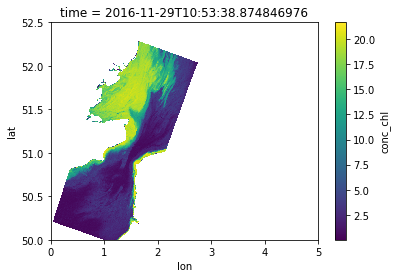

In [6]:
ds.conc_chl.isel(time=3).plot.imshow()

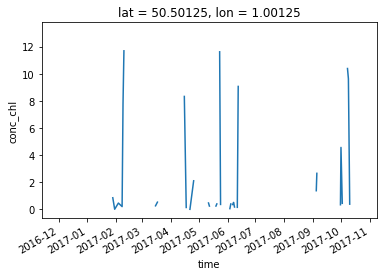

In [7]:
ds.conc_chl.sel(lon=1., lat=50.5, method='nearest').plot()

In [14]:
chl_w = ds.conc_chl.resample(time='1W').mean(dim='time')

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


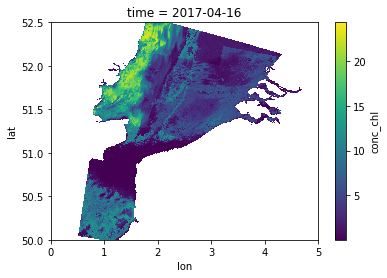

In [16]:
chl_w.isel(time=20).plot.imshow()

In [20]:
chl_w_ts = chl_w.sel(lon=1., lat=50.5, method='nearest')

In [25]:
chl_w_ts.load()

D:\Miniconda3\envs\xcube-dev\lib\site-packages\dask\array\numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'conc_chl' (time: 49)>
array([         nan, 1.554164e+00, 3.818723e+00,          nan,          nan,
       3.651237e+00,          nan,          nan, 1.009389e+01, 8.556093e-01,
       2.364715e-01, 6.418155e+00, 3.116681e-01, 4.218508e+00, 2.430177e+00,
       5.815920e-01, 3.881081e+00, 7.363688e-01, 1.221427e+00,          nan,
       8.329648e+00, 1.214289e-01, 2.107205e+00, 2.774115e-01, 2.546588e-01,
       1.744589e-01, 2.749954e+00, 2.260360e-01, 2.974880e-01, 9.067681e+00,
       7.620560e-02,          nan,          nan,          nan,          nan,
                nan,          nan, 2.260441e-03, 4.853773e-01, 3.151836e+00,
       8.151988e-01, 1.152905e+00, 3.746501e+00, 6.123230e+00, 2.454399e+00,
       3.825917e+00, 5.832733e+00, 7.620509e+00, 4.874197e-01])
Coordinates:
  * time     (time) datetime64[ns] 2016-11-27 2016-12-04 2016-12-11 ...
    lat      float64 50.5
    lon      float64 1.001

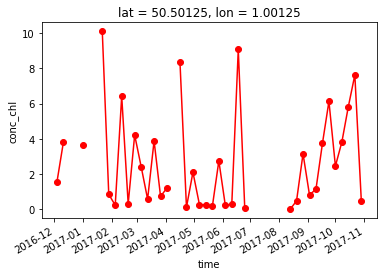

In [28]:
chl_w_ts.plot.line('r-o')

In [30]:
chl_w_ts_clean = chl_w_ts.where(~np.isnan(chl_w_ts))

NameError: name 'xr' is not defined

In [38]:
chl_w_ts_clean = chl_w_ts.where(~np.isnan(chl_w_ts), drop=True)

In [39]:
chl_w_ts_clean

<xarray.DataArray 'conc_chl' (time: 37)>
array([1.554164e+00, 3.818723e+00, 3.651237e+00, 1.009389e+01, 8.556093e-01,
       2.364715e-01, 6.418155e+00, 3.116681e-01, 4.218508e+00, 2.430177e+00,
       5.815920e-01, 3.881081e+00, 7.363688e-01, 1.221427e+00, 8.329648e+00,
       1.214289e-01, 2.107205e+00, 2.774115e-01, 2.546588e-01, 1.744589e-01,
       2.749954e+00, 2.260360e-01, 2.974880e-01, 9.067681e+00, 7.620560e-02,
       2.260441e-03, 4.853773e-01, 3.151836e+00, 8.151988e-01, 1.152905e+00,
       3.746501e+00, 6.123230e+00, 2.454399e+00, 3.825917e+00, 5.832733e+00,
       7.620509e+00, 4.874197e-01])
Coordinates:
  * time     (time) datetime64[ns] 2016-12-04 2016-12-11 2017-01-01 ...
    lat      float64 50.5
    lon      float64 1.001

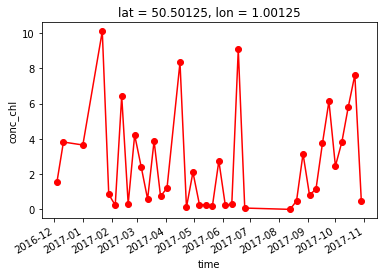

In [42]:
chl_w_ts_clean.plot.line('r-o')

In [43]:
chl_w_ts_clean.sel(time='2017-08-15', method='nearest')

<xarray.DataArray 'conc_chl' ()>
array(0.00226)
Coordinates:
    time     datetime64[ns] 2017-08-13
    lat      float64 50.5
    lon      float64 1.001

In [53]:
chl_w_ts_clean.sel(time='2017-08-15', tolerance='1D')

KeyError: '2017-08-15'

In [49]:
import pandas as pd
pd.Timedelta('1D')

Timedelta('1 days 00:00:00')